In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
#load data
df = pd.read_csv('/Users/sa21/Desktop/Financial-Fraud-Project/data/Processed/cleaned_fraud_data.csv')


# Logistic Regression 

In [47]:
X = df.drop('isFraud', axis=1) #drop unwanted target feature 
y = df['isFraud']#target features
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y,
    test_size=0.25,  # 75-25 split
    stratify=y,
    random_state=42
)



In [48]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [49]:
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_matrix

array([[1588433,     169],
       [   1142,     911]])

Text(0.5, 427.9555555555555, 'Predicted label')

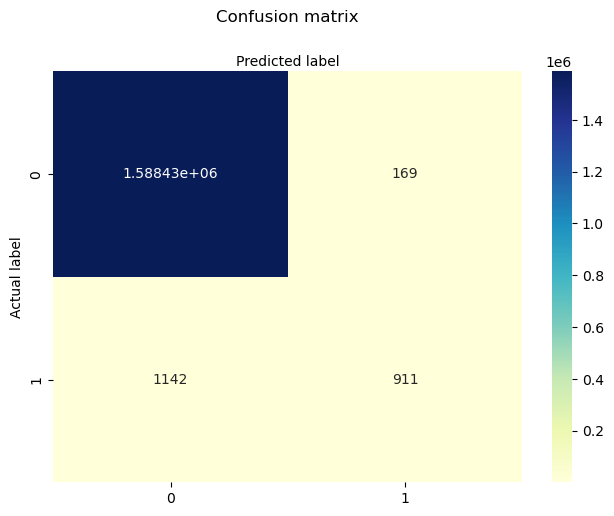

In [50]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9991758112224209
Precision: 0.8435185185185186
Recall: 0.4437408670238675
F1 Score: 0.5815512288541335


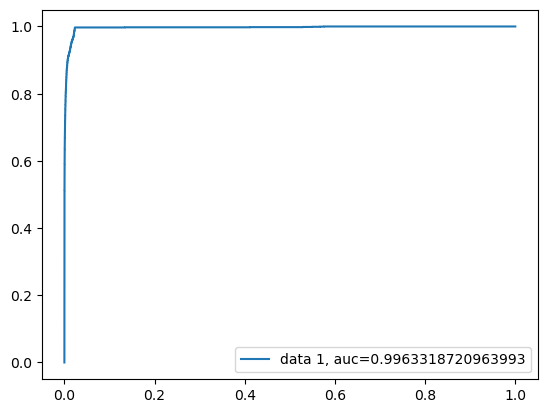

In [52]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
#load data 
df2 = pd.read_csv('/Users/sa21/Desktop/Financial-Fraud-Project/data/Processed/cleaned_fraud_data.csv')

In [60]:
#drop unwanted target feature 
X = df2.drop('isFraud', axis=1) 
y = df2['isFraud']#target features
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y,
    test_size=0.25,  # 75-25 split
    stratify=y,
    random_state=42
)



In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='binary') 
print("F1 Score:", f1)

Confusion Matrix:
 [[1588402     200]
 [    825    1228]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.86      0.60      0.71      2053

    accuracy                           1.00   1590655
   macro avg       0.93      0.80      0.85   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy Score: 0.9993556113676442
F1 Score: 0.7055443837977593
